# Case Study 2 : SafeNet With AI

##  1. Business Problem

### 1.1 Description

Nowadays, on social networks where everyone can upload whatever they want without having to count that there might be children watching that or people don't want to watch that.


The government has definitely taken a step in this direction by blocking some websites, but what about social media sites? They are openly showing NSFW (not safe for work) content on their sites. We can avoid that content using artificial intelligence.


We can use some advanced computer vision techniques to filter out that content. We cannot access social media servers and block content for everyone, but we can add filters on the user side. To add a filter between a website and a user, we can simply use a browser extension, so we can filter content with very low latency, and it is also easy to deploy by using JavaScript.

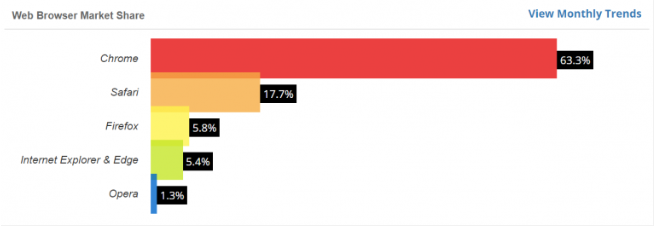

<p>So there are multiple browsers in the market, but from all the market share, Chrome single-handedly captures 63.3% of the market share. It is very beneficial and to reach more users, we decided to build a Chrome Browser Extension.

Google has very detailed and concise documentation for building chrome extensions.
</p>
<br>


__ Problem Statement __
- We have two class classification problems. we need to classify images as NSFW or SFW.
- We are using F1-Score to compare model performance.
- we need to deploy this model on a chrome extension.


### 1.2 Sources/Useful Links

- Source : https://github.com/notAI-tech/NudeNet
<br><br>____ Useful Links ____
Research Papers
- Detection and categorization of suggestive thumbnails: http://www.diva-portal.org/smash/get/diva2:1595278/FULLTEXT01.pdf
- MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications : https://arxiv.org/pdf/1704.04861.pdf
- Tensorflow Js : https://www.tensorflow.org/js

### 1.3 Real world/Business Objectives and Constraints

1. Low latency required.
2. Model size as small as possible.
3. Interpretability is partially important.

## 2. Machine Learning Problem

### 2.1 Data

* We take NSFW data from Nudenet github repository.
* and SFW data from unsplash website.
* We have tsv file which contain image links 
* We use img2dataset library to download images from link

In [ ]:
# Dataset Sources
# sfw images
# https://github.com/unsplash/datasets
# download link https://unsplash.com/data/lite/latest
# nsfw images
# https://github.com/notAI-tech/NudeNet
# https://github.com/notAI-tech/NudeNet/releases/download/v0/DETECTOR_AUTO_GENERATED_DATA.zip

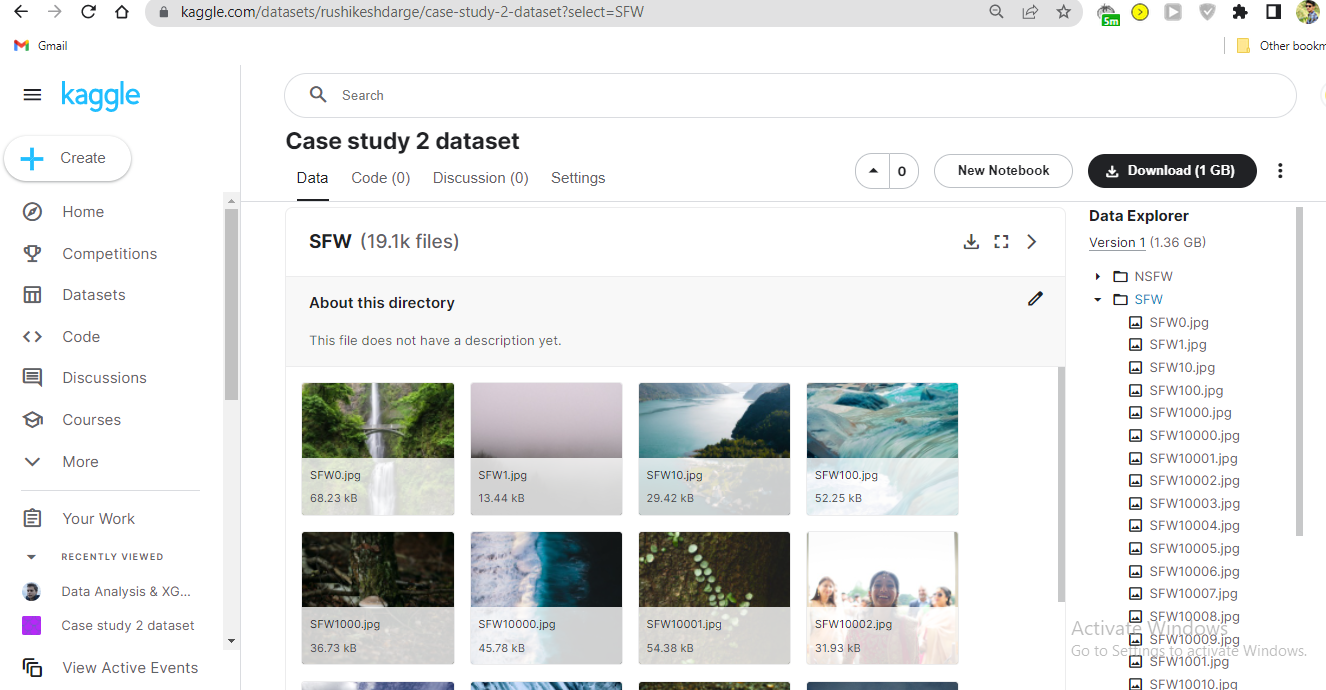

### 2.1.1 Data Overview 

- We have collected NSFW dataset from nudenet repository.
- And collect SFW dataset from Unplash website
- We have 20k of NSFW and SFW images each
- Total 40k dataset of size 1.2 GB.

### 2.1.2 Example Data point 

<p> SFW dataset </p>

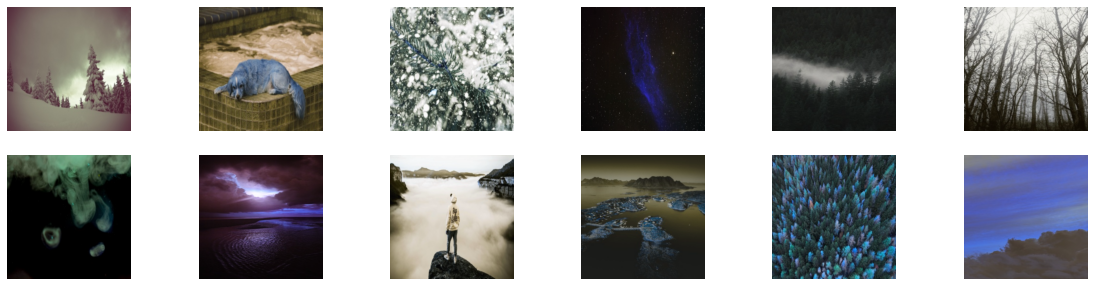

<p> NSFW dataset </p>

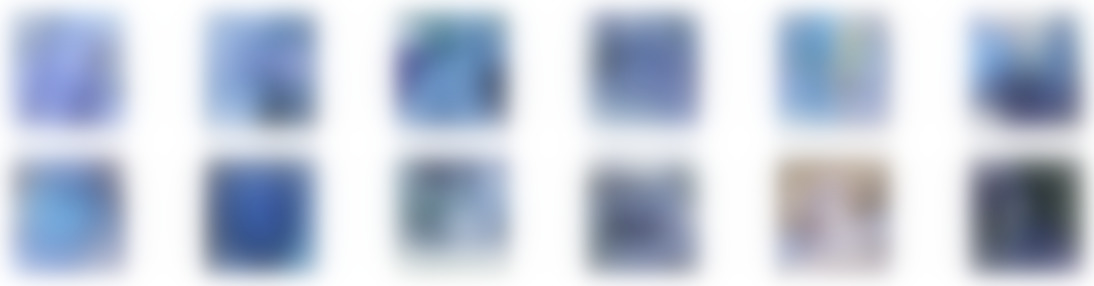

* Blur images because of adult content

## 2.2 Mapping the real world problem to an ML problem

### 2.2.1 Type of Machine Leaning Problem 

<p> It is a binary classification problem, for a given image we need to predict if they are NSFW or SFW. </p>

### 2.2.2 Performance Metric

Metric(s): 
* F1-Score
* Binary Confusion Matrix
* LIME for model explainability

### 2.3 Train and Test Construction 

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

# 3. Exploratory Data Analysis 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm


In [ ]:
%%writefile kaggle.json
{"username":"rushikeshdarge","key":"**********************"}

Writing kaggle.json


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rushikeshdarge/case-study-2-dataset
!unzip /content/case-study-2-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CS2_dataset/SFW/SFW55.jpg  
  inflating: CS2_dataset/SFW/SFW550.jpg  
  inflating: CS2_dataset/SFW/SFW5500.jpg  
  inflating: CS2_dataset/SFW/SFW5501.jpg  
  inflating: CS2_dataset/SFW/SFW5502.jpg  
  inflating: CS2_dataset/SFW/SFW5503.jpg  
  inflating: CS2_dataset/SFW/SFW5504.jpg  
  inflating: CS2_dataset/SFW/SFW5505.jpg  
  inflating: CS2_dataset/SFW/SFW5506.jpg  
  inflating: CS2_dataset/SFW/SFW5507.jpg  
  inflating: CS2_dataset/SFW/SFW5508.jpg  
  inflating: CS2_dataset/SFW/SFW5509.jpg  
  inflating: CS2_dataset/SFW/SFW551.jpg  
  inflating: CS2_dataset/SFW/SFW5510.jpg  
  inflating: CS2_dataset/SFW/SFW5511.jpg  
  inflating: CS2_dataset/SFW/SFW5512.jpg  
  inflating: CS2_dataset/SFW/SFW5513.jpg  
  inflating: CS2_dataset/SFW/SFW5514.jpg  
  inflating: CS2_dataset/SFW/SFW5515.jpg  
  inflating: CS2_dataset/SFW/SFW5516.jpg  
  inflating: CS2_dataset/SFW/SFW5517.jpg  
  inflating: CS2_dataset/SFW/SFW5518.jpg  
  infla

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,path,label
0,/content/CS2_dataset/NSFW/NSFW4458.jpg,1
1,/content/CS2_dataset/NSFW/NSFW5711.jpg,1
2,/content/CS2_dataset/NSFW/NSFW1982.jpg,1
3,/content/CS2_dataset/NSFW/NSFW6483.jpg,1
4,/content/CS2_dataset/NSFW/NSFW3529.jpg,1


In [ ]:
df.shape

(39117, 2)

* Checking dimension of images

In [ ]:
height = []
width = []
for i in tqdm(range(0,10000)):
    img_rn_num = np.random.randint(0,df.shape[0])
    im = cv2.imread(df.path[img_rn_num], cv2.IMREAD_UNCHANGED)
    height.append(im.shape[0])
    width.append(im.shape[1])

100%|██████████| 10000/10000 [00:19<00:00, 513.77it/s]


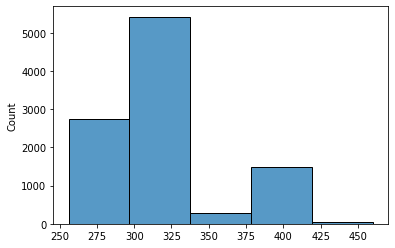

In [ ]:
sns.histplot(height, bins=5)

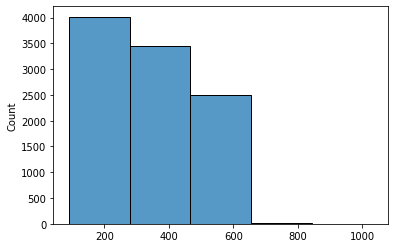

In [ ]:
sns.histplot(width, bins=5)

* We can see the distribution of height and width of images
* We choosing 256 as both height and width also, to reduce calculation and to increase speed of model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


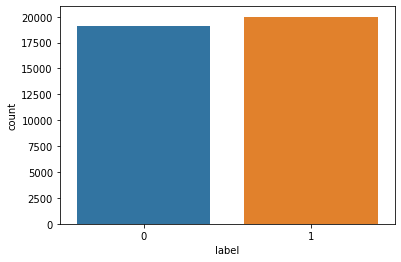

In [ ]:
sns.countplot(df.label)

In [ ]:
print('Number of SFW datapoints are',df[df.label == 0].shape[0])
print('Number of NSFW datapoints are',df[df.label == 1].shape[0])

Number of SFW datapoints are 19118
Number of NSFW datapoints are 19999


* We have approx 20k datapoints for each classes means balance classes

In [ ]:
print('We have {} duplicate images'.format(np.sum(df['path'].duplicated())))

We have 0 duplicate images


In [ ]:
df.isnull().sum()

path     0
label    0
dtype: int64

* No null values in dataset

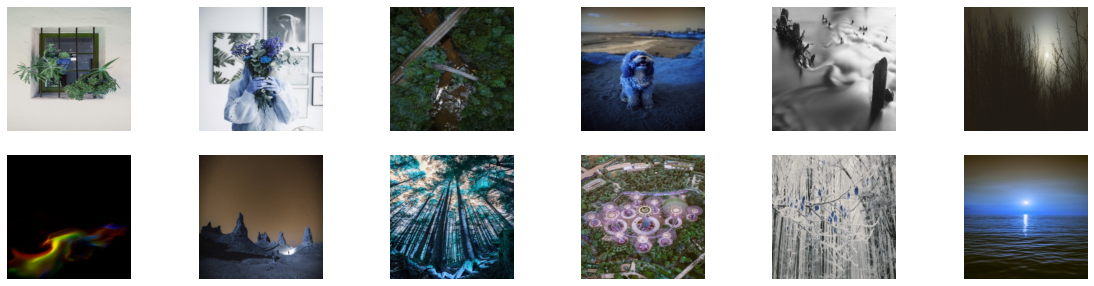

In [ ]:
plt.figure(figsize=(20,5))
n_row = 2
n_col = 6

for i in range(0,13):
    # choosing random image
    img_rn_num = np.random.randint(20000,39000)
    # read image
    im = cv2.imread(df.path[img_rn_num] , cv2.IMREAD_UNCHANGED)
    # resize image
    im = cv2.resize(im, (512, 512))
    plt.imshow(im)
    plt.axis('off')
    if i < 12:
        plt.subplot(n_row, n_col, i+1)
plt.show()